**Retail Sales Analysis EDA Project**

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv("/content/retail_sales_dataset.csv")

In [4]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


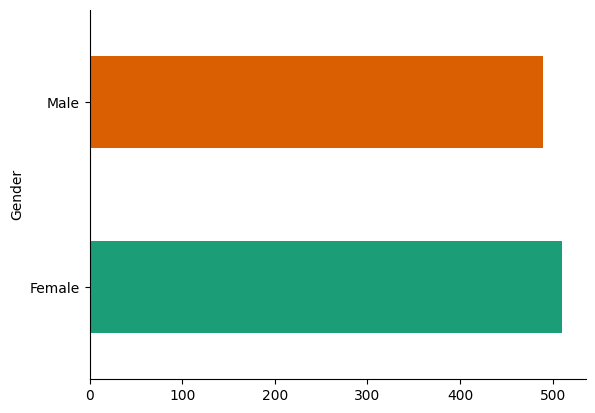

In [35]:
# @title Gender

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Gender').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

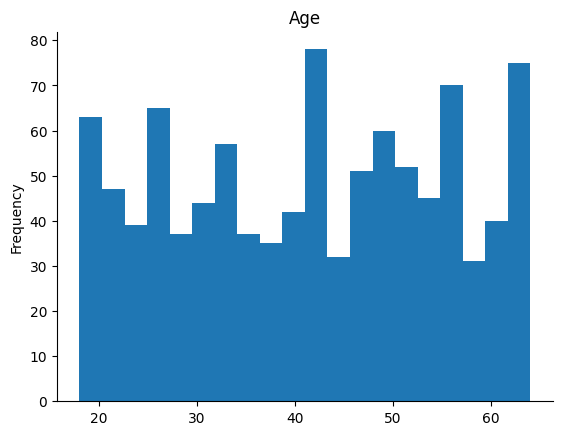

In [34]:
# @title Age

from matplotlib import pyplot as plt
df['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [5]:
df.shape

(1000, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [7]:
df.isnull().sum()

,0
Transaction ID,0
Date,0
Customer ID,0
Gender,0
Age,0
Product Category,0
Quantity,0
Price per Unit,0
Total Amount,0


In [8]:
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [9]:
df = df.dropna()

In [10]:
df['Date'] = pd.to_datetime(df['Date'])

In [11]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [12]:
df = df.drop_duplicates()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Customer ID       1000 non-null   object        
 3   Gender            1000 non-null   object        
 4   Age               1000 non-null   int64         
 5   Product Category  1000 non-null   object        
 6   Quantity          1000 non-null   int64         
 7   Price per Unit    1000 non-null   int64         
 8   Total Amount      1000 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 70.4+ KB


In [16]:
top_products = df.groupby("Product Category")["Quantity"].sum().sort_values(ascending=False)

In [17]:
top_products

,Quantity
Product Category,
Clothing,894
Electronics,849
Beauty,771


In [19]:
min_date = df['Date'].min()

In [20]:
max_date = df['Date'].max()

In [21]:
print("minimum data", min_date)

minimum data 2023-01-01 00:00:00


In [22]:
print("maximum date", max_date)

maximum date 2024-01-01 00:00:00


In [27]:
df["Month"] = df["Date"].dt.to_period("M")

In [28]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Month
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,2023-11
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,2023-02
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,2023-01
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,2023-05
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,2023-05


In [26]:
monthly_sales = df.groupby("Month")["Total Amount"].sum()

In [31]:
monthly_sales

,Total Amount
Month,
2023-01,35450
2023-02,44060
2023-03,28990
2023-04,33870
2023-05,53150
2023-06,36715
2023-07,35465
2023-08,36960
2023-09,23620


In [29]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Month
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,2023-11
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,2023-02
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,2023-01
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,2023-05
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,2023-05


In [30]:
import matplotlib.pyplot as plt

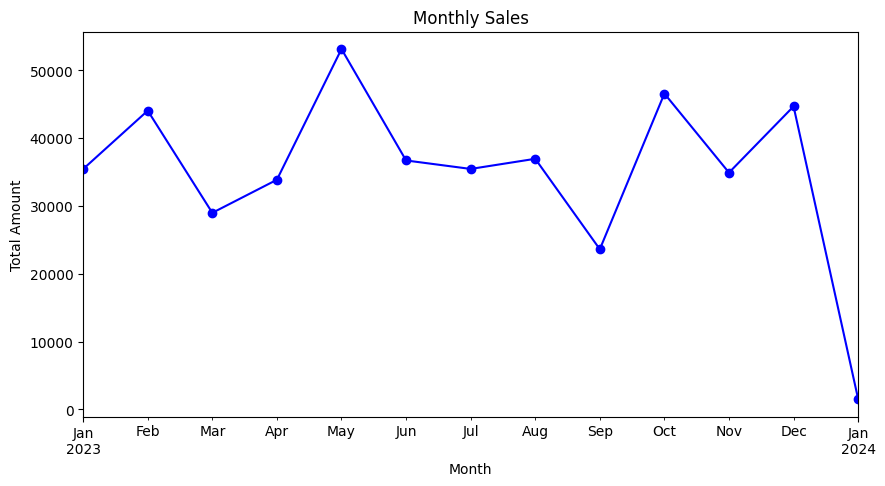

In [33]:
plt.figure(figsize=(10,5))
monthly_sales.plot(kind="line", marker = "o", color = "b")
plt.title("Monthly Sales")
plt.xlabel("Month")
plt.ylabel("Total Amount")
plt.show()

In [41]:
top_customers = df.groupby("Customer ID")["Total Amount"].sum().sort_values(ascending=False)
print(top_customers.head(10))

Customer ID
CUST015    2000
CUST412    2000
CUST970    2000
CUST547    2000
CUST281    2000
CUST416    2000
CUST420    2000
CUST927    2000
CUST447    2000
CUST342    2000
Name: Total Amount, dtype: int64


In [42]:
print(top_customers.tail(10))

Customer ID
CUST318    25
CUST363    25
CUST423    25
CUST427    25
CUST454    25
CUST379    25
CUST952    25
CUST371    25
CUST397    25
CUST955    25
Name: Total Amount, dtype: int64


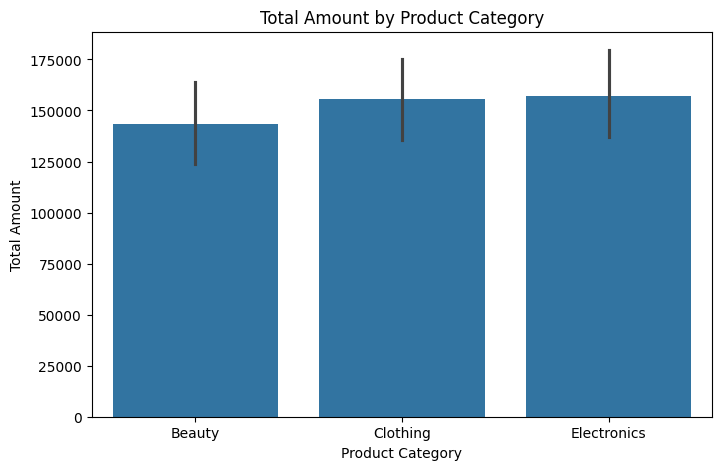

In [43]:
import seaborn as sns
plt.figure(figsize=(8,5))
sns.barplot(x= df["Product Category"], y=df["Total Amount"], estimator = sum)
plt.title("Total Amount by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Total Amount")
plt.show()

Text(0, 0.5, 'Total Amount')

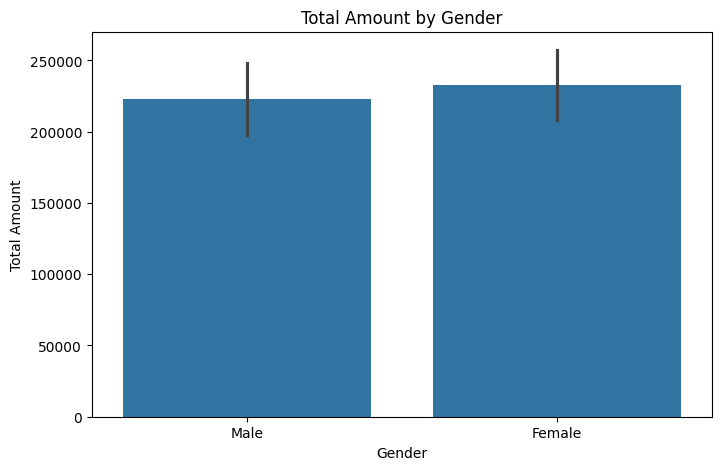

In [45]:
plt.figure(figsize=(8,5))
sns.barplot(x= df["Gender"], y=df["Total Amount"], estimator = sum)
plt.title("Total Amount by Gender")
plt.xlabel("Gender")
plt.ylabel("Total Amount")

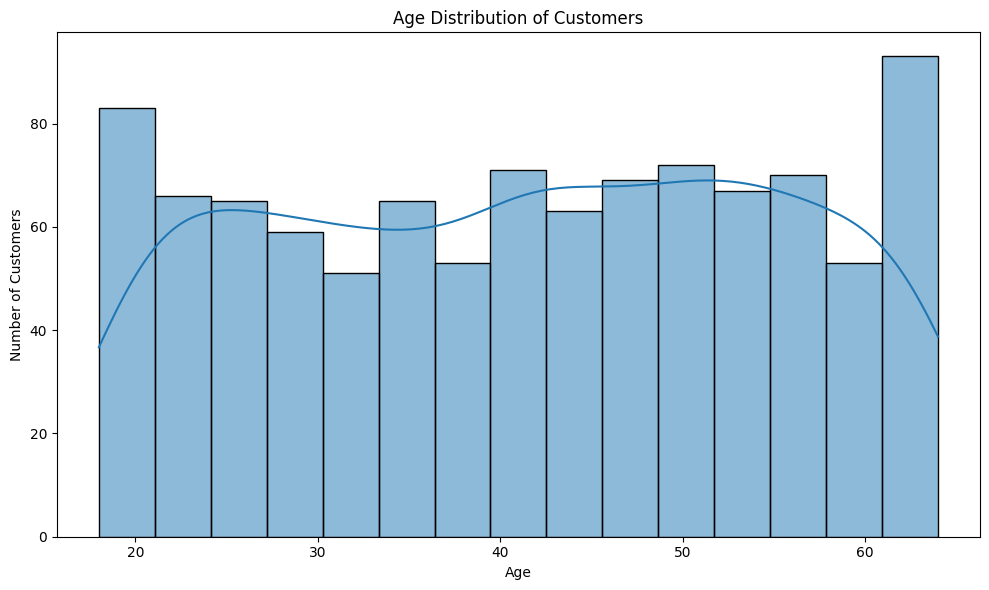

In [46]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=15, kde=True)
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()

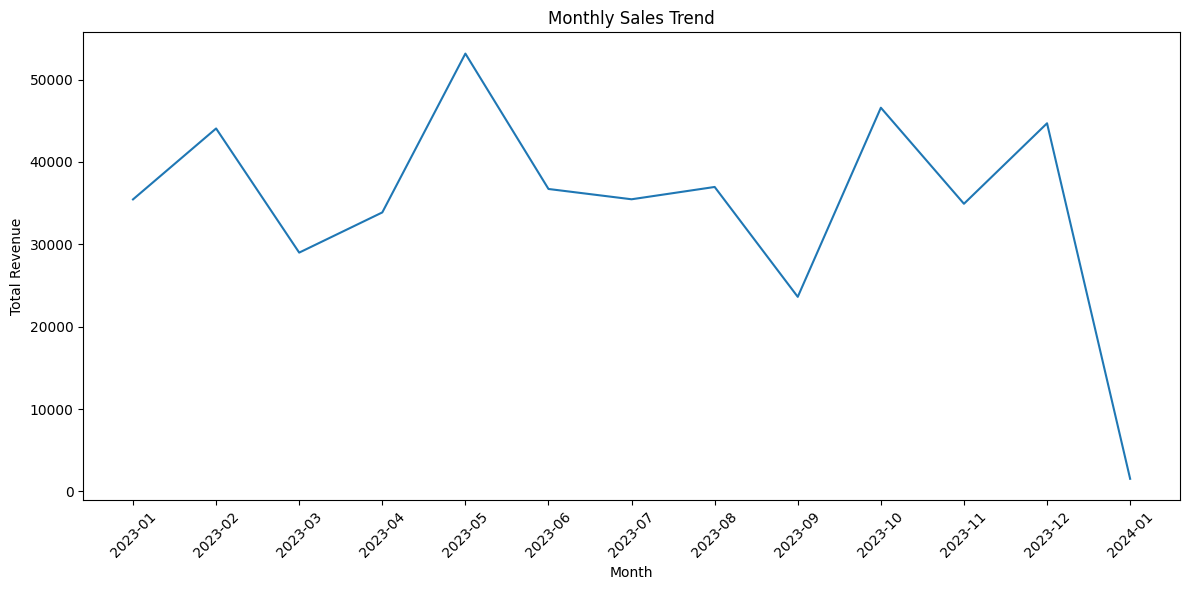

In [47]:
df['Month'] = df['Date'].dt.to_period('M')
monthly_sales = df.groupby('Month')['Total Amount'].sum().reset_index()
monthly_sales['Month'] = monthly_sales['Month'].astype(str)

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='Month', y='Total Amount')
plt.title('Monthly Sales Trend')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Axes: xlabel='Hour', ylabel='DayOfWeek'>

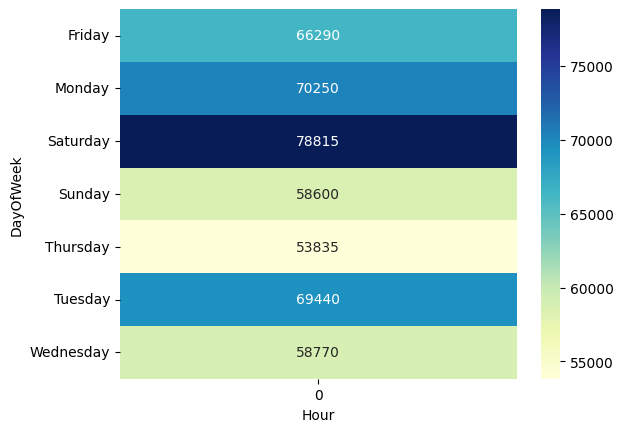

In [49]:
df['DayOfWeek'] = df['Date'].dt.day_name()
sales_heatmap = df.pivot_table(index='DayOfWeek', columns='Hour', values='Total Amount', aggfunc='sum')
sns.heatmap(sales_heatmap, cmap="YlGnBu", annot=True, fmt=".0f")